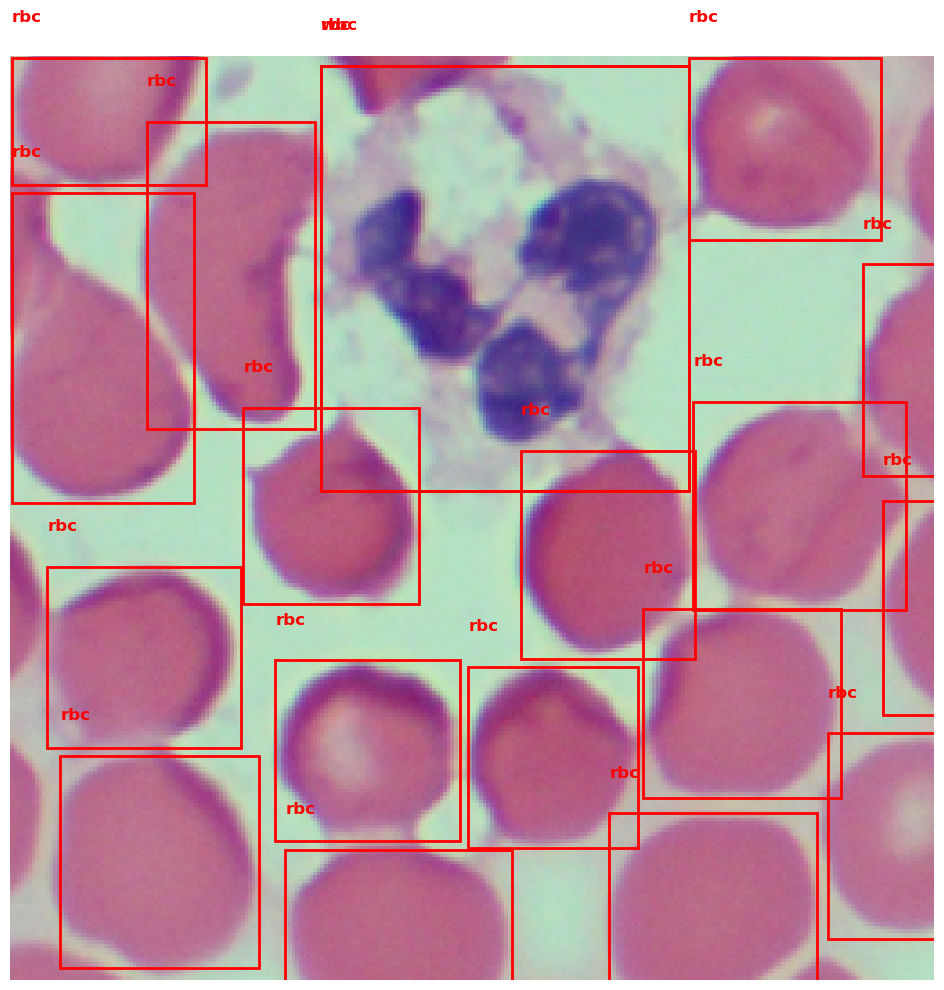

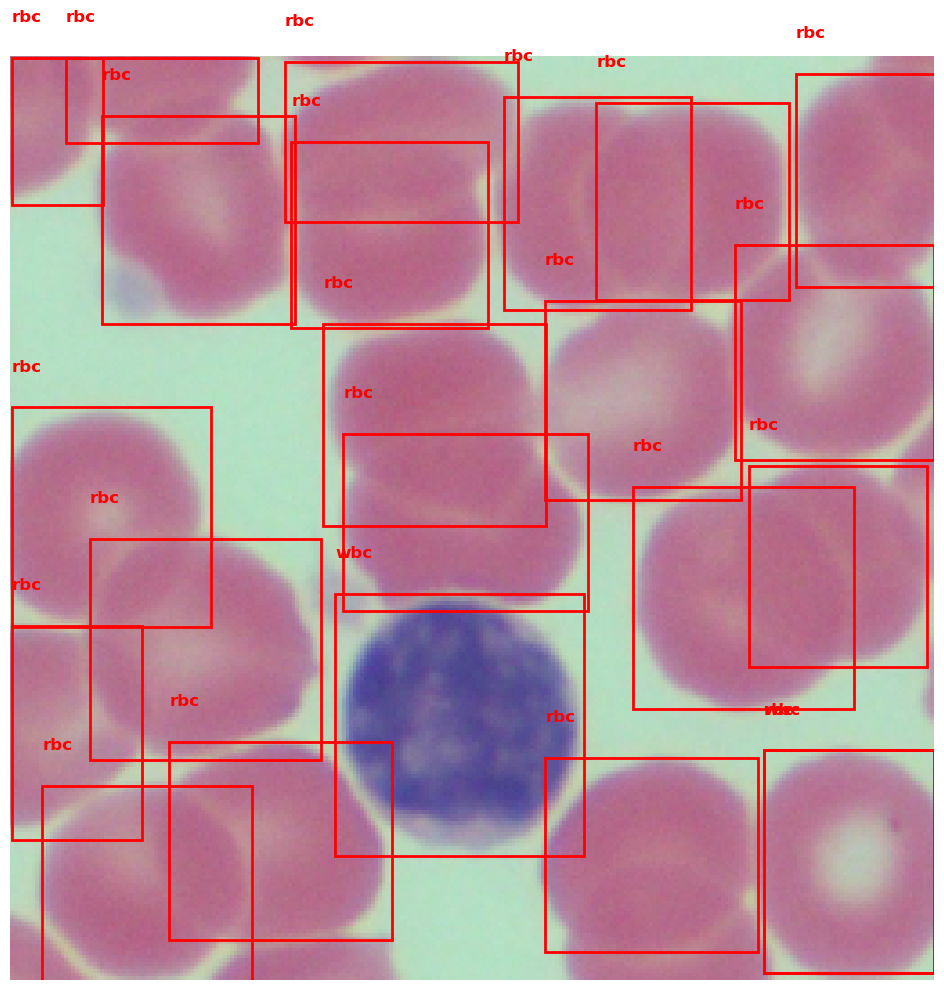

In [6]:
import cv2
import matplotlib.pyplot as plt

def load_annotations(annotation_path):
    annotations = []
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            label = parts[0]
            x_min = float(parts[4])
            y_min = float(parts[5])
            x_max = float(parts[6])
            y_max = float(parts[7])
            annotations.append((label, x_min, y_min, x_max, y_max))
    return annotations

def display_image_with_bboxes(image_path, annotation_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Load the annotations
    annotations = load_annotations(annotation_path)
    
    # Plot the image
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    
    # Add bounding boxes and labels
    for annotation in annotations:
        label, x_min, y_min, x_max, y_max = annotation
        # Draw the bounding box
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                             edgecolor='red', facecolor='none', linewidth=2)
        plt.gca().add_patch(rect)
        # Add the label
        plt.text(x_min, y_min - 10, label, color='red', fontsize=12, weight='bold')
    
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/home/max/python_pg/tf_od/blood-dataset/images/image-1.png'
annotation_path = '/home/max/python_pg/tf_od/blood-dataset/labels/image-1.txt'
display_image_with_bboxes(image_path, annotation_path)

image_path2 = '/home/max/python_pg/tf_od/blood-dataset/images/image-100.png'
annotation_path2 = '/home/max/python_pg/tf_od/blood-dataset/labels/image-100.txt'
display_image_with_bboxes(image_path2, annotation_path2)


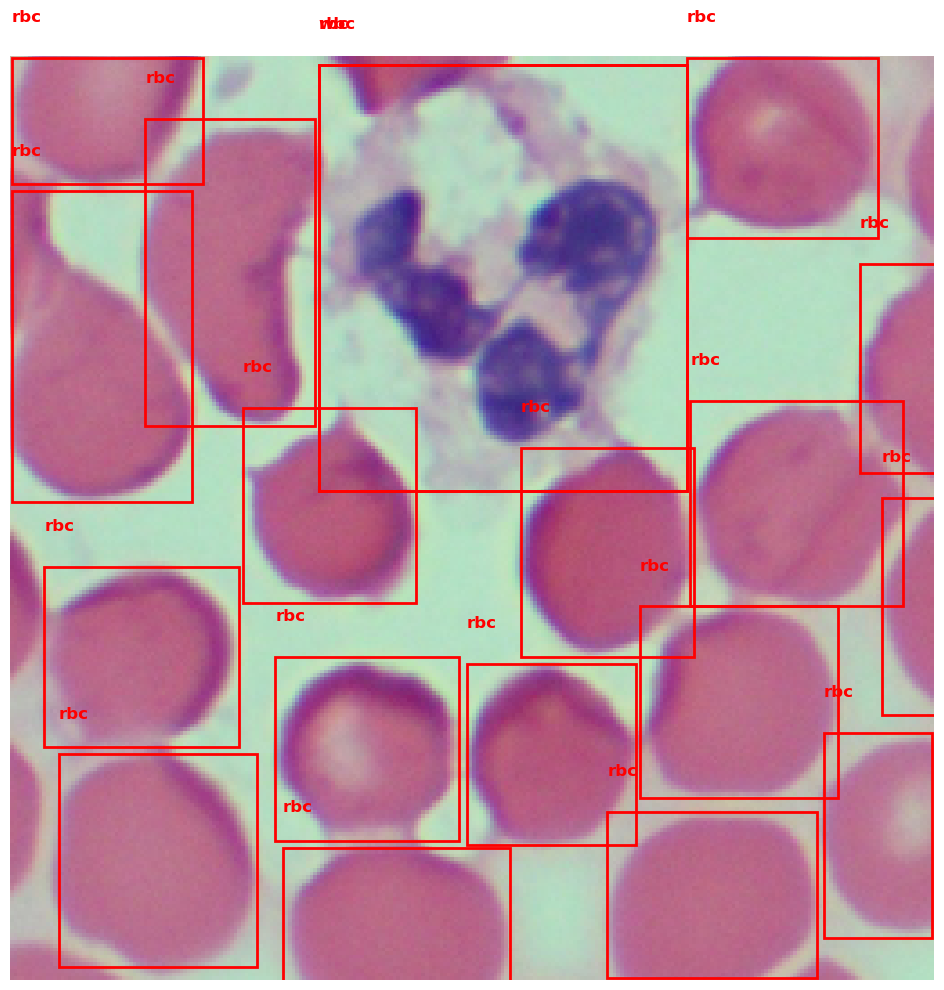

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

def load_yolo_annotations(annotation_path, image_width, image_height):
    annotations = []
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            center_x = float(parts[1])
            center_y = float(parts[2])
            bbox_width = float(parts[3])
            bbox_height = float(parts[4])

            # Convert YOLO format to pixel coordinates
            x_min = int((center_x - bbox_width / 2) * image_width)
            y_min = int((center_y - bbox_height / 2) * image_height)
            x_max = int((center_x + bbox_width / 2) * image_width)
            y_max = int((center_y + bbox_height / 2) * image_height)

            annotations.append((class_id, x_min, y_min, x_max, y_max))
    return annotations

def display_image_with_yolo_bboxes(image_path, yolo_annotation_path, class_names):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    
    # Load the YOLO annotations
    annotations = load_yolo_annotations(yolo_annotation_path, width, height)
    
    # Plot the image
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    
    # Add bounding boxes and labels
    for annotation in annotations:
        class_id, x_min, y_min, x_max, y_max = annotation
        label = class_names[class_id]
        # Draw the bounding box
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                             edgecolor='red', facecolor='none', linewidth=2)
        plt.gca().add_patch(rect)
        # Add the label
        plt.text(x_min, y_min - 10, label, color='red', fontsize=12, weight='bold')
    
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/home/max/python_pg/tf_od/blood-dataset/images/image-1.png'
yolo_annotation_path = '/home/max/python_pg/tf_od/blood-dataset/yolo/eval/annotations/image-1.txt'
class_names = ['wbc', 'rbc']
display_image_with_yolo_bboxes(image_path, yolo_annotation_path, class_names)
